# 4. Training model
___

It's important to understand the inner workings of the different models to make the most of them.

## 1. Linear Regression

Let's strart with the Linear regression model, there are two ways of training it:

* Using a direct *closed_form* equation.
* Using an iterative optimization or gradient descent (GD).

The general linear model is a the weighted sum of the imput features plus a constant called the _bias term_:

$\hat{y}=\theta_0+\theta_1 x_1+\theta_2 x_2+\cdots +\theta_n x_n$

* $\hat{y}$ is the predicted value.
* $n$ is the number of features.
* $x_i$ is the $i^{th}$ feature value. 
* $\theta_j$ is the $j^{th}$ model parameter.

The vectorized form of the equation looks as follows:

$\hat{y}=h_\theta(x)=\theta^T\cdot x$

* $\theta$ is the model's parameter vector, containing the bias term $\theta_0$ and all the feature weights.
* $x$ is the instance's feature vector, containing $x_0$ to $x_n$ where $x_0$ always equals to 1.
* $h_\theta$ is the hypothesis function, using the model parameters $\theta$

To train a Linear Regression model we can **find the value of $\theta$ that minimizes the MSE**, the vectorized MSE function looks as follows:

$MSE (X,h_\theta) = \tfrac{1}{m}\sum_{i=1}^{m}(\theta^T\cdot x^{(i)}-y^{(i)})^2$

One way to find the value of $\theta$ that minimizes the cost function is to use the **closed_form solution (Normal Equation)**.

 $\hat{\theta}=(X^T\cdot X)^{-1}\cdot X^T\cdot y$


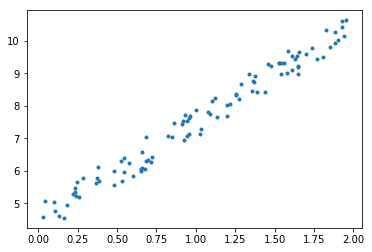

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = 2*np.random.rand(100, 1)
y = 4+3*X + np.random.rand(100,1)

plt.scatter(X,y,marker='.')
plt.show()

In [11]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.51057284],
       [2.99532614]])

Now we can make predictions using $\hat{\theta}$:

In [14]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51057284],
       [10.50122511]])

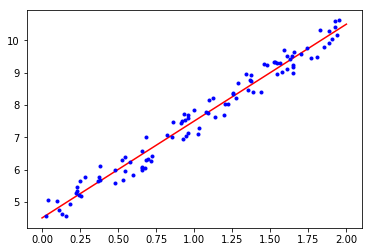

In [17]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.show()

The equivalent code using Scikit-Learn looks like:

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_, lin_reg.predict(X_new)


(array([4.51057284]), array([[2.99532614]]), array([[ 4.51057284],
        [10.50122511]]))

The normal equation has a computational complexity of about $O(n^3)$ which means that if you double the number of features you multiply the computation time by 5.3 to 8. Let's look at better ways to train a Linear Regression for cases where there are a large number of features or too many training instances to fit in memory.

Another way to minimize the MSE is using **Gradient Descent**, the general idea is to tweak parameters iteratively in order to minimize a cost function. An important parameter in GD is the size of the steps or _learning rate_. If the learning rate is too small the algorithm will have to go through many iterations to converge. On the other hand, if the learning rate is too high the algorithm might diverge.

Fortunately, the MSE cost function for a Linear Regression is a convex function. This implies that there is no local minima and that is a continuous function.

A way to implement a GD is with a **Batch Gradient Descent** in which you compute the gradient (partial derivative) of the cost function with regards to each model parameter. In other words how much the cost function will change if you change a single parameter a little bit.

$\frac{\partial}{\partial \theta_j}MSE(\theta)=\tfrac{2}{m}\sum_{i=1}^{m}(\theta^T\cdot x^{(i)}-y^{(i)})x_j^{(i)}$

$\nabla_\theta MSE(\theta) = \begin{bmatrix}
    \frac{\partial}{\partial \theta_0}MSE(\theta)\\
    \frac{\partial}{\partial \theta_1}MSE(\theta)\\
    \vdots\\
    \frac{\partial}{\partial \theta_n}MSE(\theta)
\end{bmatrix}=\frac{2}{m}X^T\cdot (X\cdot \theta-y)$

$\theta^{(next\space step)}=\theta -\eta \nabla_\theta MSE(\theta)$

Where $\eta$ is the learning rate.

In [28]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    
theta

array([[4.51057284],
       [2.99532614]])

The effect of the learning step on the GD of the MSE can be seen in the next graphs:

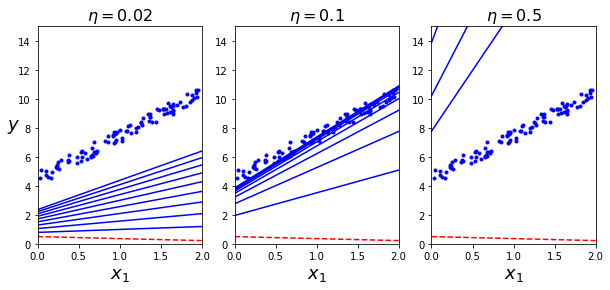

In [30]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()